# Lab 6 - Multiclass

This lab will explore multi-class classifications using neural networks

In [1]:
# Tools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2024-07-29 16:21:37.925592: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Multi-class classification

Photos and sentences can hold multi-class classification problems as a photo can include a cat, a dog and a horse, each needed to be labelled, and a sentence is filled with no only nouns and non-nouns, but verbs, adjectives, pronouns and so on. 

In a model, each output is associated with a category. When an input is placed into the model, each output will compute a value. An applied softmax function converts these values into a probability distribution. 

### Prepare and visualise the data

In [2]:
# 4 class dataset
classes = 4
m = 100
centers = [[-5,2],[-2,-2],[1,2],[5,-2]]
std = 1.0
X_train, y_train = make_blobs(n_samples = m, centers = centers, cluster_std = std, random_state = 30)


/Users/charlotteprobstel/Desktop/Private/Courses/Advanced-Learning-Algorithms/Week 2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


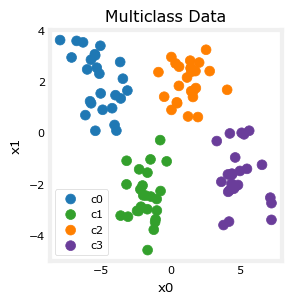

In [3]:
#Visualise 
plt_mc(X_train, y_train, classes, centers, std = std)

In [4]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"First ten class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
First ten class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


### Model

In [5]:
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(2, activation = "relu", name = "L1"),
        Dense(4, activation = "linear", name = "L2")
    ]
)

The code: from_logits = True : specifies that the output activation should be linear and not softmax. 

In [6]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train, y_train,
    epochs = 200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2157  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8799 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5841 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3166 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0756 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8617 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6749 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5154 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3820 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2723 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1832 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1111 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0525 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0040 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9635 
Epoch 16/200
4/4 ━

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


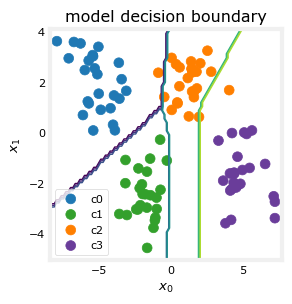

In [7]:
plt_cat_mc(X_train, y_train, model, classes)

/Users/charlotteprobstel/Desktop/Private/Courses/Advanced-Learning-Algorithms/Week 2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/charlotteprobstel/Desktop/Private/Courses/Advanced-Learning-Algorithms/Week 2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


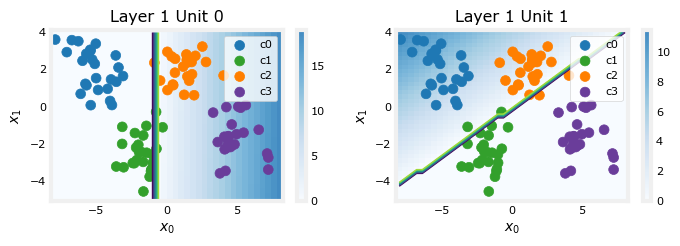

In [8]:
# Gather weights from the first layer
l1 = model.get_layer("L1")
W1, b1 = l1.get_weights()
# Plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

In [9]:
# Second layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()

In [11]:
# Create new features using L1
Xl2 = np.maximum(0, np.dot(X_train, W1) + b1)

/Users/charlotteprobstel/Desktop/Private/Courses/Advanced-Learning-Algorithms/Week 2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/charlotteprobstel/Desktop/Private/Courses/Advanced-Learning-Algorithms/Week 2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/charlotteprobstel/Desktop/Private/Courses/Advanced-Learning-Algorithms/Week 2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/charlotteprobstel/Desktop/Private/Courses/Advanced-Learning-Algorithms/Week 2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.s

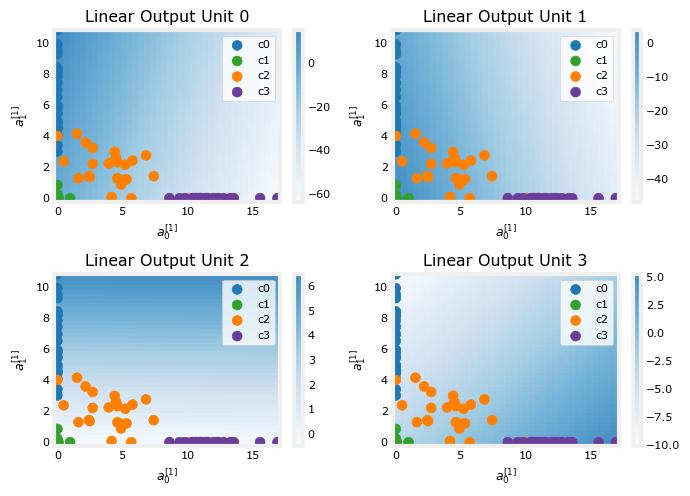

In [12]:
plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25, np.amax(Xl2[:,0])), x1_rng = (-0.25, np.amax(Xl2[:,1])))